In [1]:
# import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [25]:
min_nodes=4
max_nodes=50
num_graphs=1000000
np.random.seed(42) 

In [31]:
def constant_graphon(u, v):
    return 0.5

def linear_graphon(u, v):
    return (u*v)

def quadratic_graphon(u, v):
    return u**2 * v**2

def sigmoidal_graphon(u, v):
    return 1 / (1 + np.exp(-10*(u-v)))

def randomized_graphon(u, v):
    return np.random.rand()

def step_graphon(u, v):
    threshold = 0.5
    return 1 if u > threshold and v > threshold else 0

def sin_graphon(u, v):
    return np.sin( np.pi * u) * np.sin( np.pi * v)

def avg_graphon(u, v):
    return (u+v)/2

def exponential_decay_graphon(u, v):
    return np.exp(-(u**2 + v**2))

def checkerboard_graphon(u, v):
    return 1 if (u*10).astype(int) % 2 == (v*10).astype(int) % 2 else 0

def softmax_graphon(u, v):
    return np.exp(u) / (np.exp(u) + np.exp(v))

custom_graphons = [randomized_graphon,
    constant_graphon,
    linear_graphon,
    quadratic_graphon,
    sigmoidal_graphon,
    randomized_graphon,
    step_graphon,
    sin_graphon,
    avg_graphon,
    exponential_decay_graphon,
    checkerboard_graphon,
    softmax_graphon
]

In [27]:
def graphon_graph(n):
    """
    Generate a graphon graph with n nodes using the given graphon function w.
    Returns:
        G (nx.Graph): Graphon graph.
    """
    W= np.random.choice(custom_graphons)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    U= np.random.rand(n)
    
    # Generate edges based on the graphon function
    for i in range(n):
        for j in range(i + 1, n):
            p = W(U[i], U[j])
            if np.random.rand() < p:
                G.add_edge(i, j)

    return G


In [ ]:
graphs=[]
num_nodes=[]
for l in range(num_graphs):
    # if l%10000==0:
    #     print(l)
    n = np.random.randint(min_nodes, max_nodes+1)
    if n<=6:
        n = np.random.randint(min_nodes, max_nodes+1)
    G = graphon_graph(n)
    graphs.append(G)
    num_nodes.append(n)

In [35]:
# n = 5
# G = graphon_graph(n)
# pos = nx.spring_layout(G,seed=42)  # Positioning nodes
# nx.draw(G, pos,with_labels=True, node_color='skyblue', node_size=500, font_size=10, font_color='black')
# plt.show()

In [57]:
def analyze_node_distribution(num_nodes):
    # Basic statistics
    mean_nodes = np.mean(num_nodes)
    median_nodes = np.median(num_nodes)
    min_nodes = np.min(num_nodes)
    max_nodes = np.max(num_nodes)
    std_dev_nodes = np.std(num_nodes)
    
    # Histogram plot
    plt.hist(num_nodes, bins=47, edgecolor='black')
    plt.title('Distribution of Number of Nodes')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Frequency')
    plt.show()
    
    # Print statistics
    print(f"Mean Number of Nodes: {mean_nodes}")
    print(f"Median Number of Nodes: {median_nodes}")
    print(f"Minimum Number of Nodes: {min_nodes}")
    print(f"Maximum Number of Nodes: {max_nodes}")
    print(f"Standard Deviation of Number of Nodes: {std_dev_nodes}")

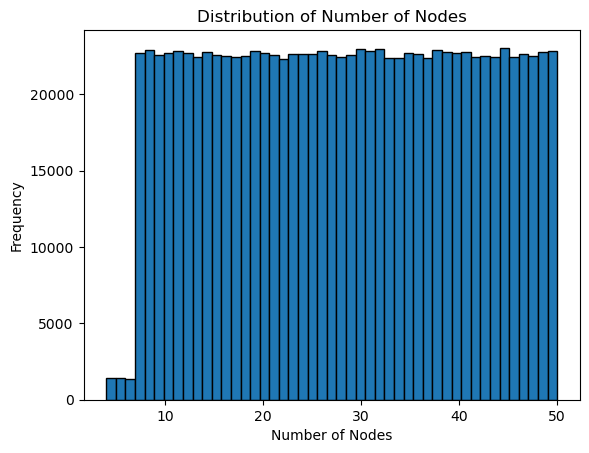

Mean Number of Nodes: 28.399071
Median Number of Nodes: 28.0
Minimum Number of Nodes: 4
Maximum Number of Nodes: 50
Standard Deviation of Number of Nodes: 12.768328055660186


In [58]:
analyze_node_distribution(num_nodes)

In [ ]:
formatted_graphs ={}
for idx,G in enumerate(graphs):
    # if idx%100000==0:
    #     print(idx)
    formatted_graphs[idx] = {node: list(G.neighbors(node))  for node in G.nodes()}



In [55]:
formatted_graphs[1]

{0: [2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 1: [2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 15, 16, 17, 18, 19],
 2: [0, 1, 6, 7, 8, 11, 12, 13, 14, 15, 17, 18, 19],
 3: [0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 19],
 4: [1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 5: [0, 1, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19],
 6: [0, 1, 2, 3, 4, 5, 7, 8, 11, 15],
 7: [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 14, 15, 17],
 8: [0, 1, 2, 3, 4, 5, 6, 7, 15],
 9: [3, 4, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 10: [0, 1, 3, 4, 5, 7, 9, 11, 13, 14, 15, 16, 17, 18, 19],
 11: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 15],
 12: [0, 1, 2, 3, 4, 5, 9, 13, 14, 15, 18, 19],
 13: [0, 2, 4, 5, 9, 10, 12, 15, 16],
 14: [0, 1, 2, 3, 4, 5, 7, 9, 10, 12, 15, 19],
 15: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 16: [0, 1, 3, 4, 5, 9, 10, 13, 19],
 17: [0, 1, 2, 3, 4, 5, 7, 9, 10, 19],
 18: [0, 1, 2, 4, 9, 10, 12, 19],
 19: [0, 1, 2, 3, 4, 5, 9, 10, 12, 14, 16, 17, 18]}

In [56]:
import json
with open("../data/Graphon/All_graphs.json",'w') as json_file:
    json.dump(formatted_graphs, json_file)